In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install pgmpy

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ---------------------------------------- 2.0/2.0 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 15.8/15.8 MB 4.9 MB/s eta 0:00:00
     --------------------------------------- 46.2/46.2 MB 11.7 MB/s eta 0:00:00
     --------------------------------------- 11.0/11.0 MB 14.5 MB/s eta 0:00:00
     --------------------------------------- 11.6/11.6 MB 18.2 MB/s eta 0:00:00
     -------------------------------------- 103.2/103.2 kB 5.8 MB/s eta 0:00:00
     ------------------------------------- 159.8/159.8 MB 34.5 MB/s eta 0:00:00
     ---------------------------------------- 9.9/9.9 MB 31.5 MB/s eta 0:00:00
     ---------------------------------------- 78.3/78.3 kB ? eta 0:00:00
     ------------------------------------- 301.8/301.8 kB 18.2 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

DEMO_URL = 'http://ctgan-demo.s3.amazonaws.com/census.csv.gz'


def load_demo():
    """Load the demo."""
    return pd.read_csv(DEMO_URL, compression='gzip')

df = load_demo()
# adult_label = adult.iloc[:,-1]
# target = adult.iloc[:,:-1]
print(df.columns)
df

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
from sklearn.preprocessing import KBinsDiscretizer

# Assuming 'Feature1', 'Feature2', 'Feature3', and 'Feature4' are continuous variables
features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Discretize the continuous features into 3 bins each
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
df[features] = discretizer.fit_transform(df[features])

print(df.head())


   age          workclass  fnlwgt   education  education-num  \
0  0.0          State-gov     0.0   Bachelors            2.0   
1  1.0   Self-emp-not-inc     0.0   Bachelors            2.0   
2  0.0            Private     0.0     HS-grad            1.0   
3  1.0            Private     0.0        11th            1.0   
4  0.0            Private     0.0   Bachelors            2.0   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0           0.0           0.0             1.0   United-States   <=50

In [5]:
from pgmpy.models import BayesianNetwork

# Define the structure of the Bayesian Network
# Assume the target variable is 'Target' and the features are 'Feature1', 'Feature2', 'Feature3', and 'Feature4'
model = BayesianNetwork([('age', 'income'),
                         ('workclass', 'income'),
                         ('fnlwgt', 'income'),
                         ('education', 'income'),
                         ('education-num', 'income'),
                         ('marital-status', 'income'),
                        ('occupation', 'income'),
                         ('relationship', 'income'),
                         ('race', 'income'),
                           ('sex', 'income'),
                         ('capital-gain', 'income'),
                         ('capital-loss', 'income'),
                         ('hours-per-week', 'income'),
                         ('native-country', 'income'),
                         ]
                        )


D:\SummerResearch\summer_research\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
from pgmpy.estimators import MaximumLikelihoodEstimator

# Fit the model to the data
model.fit(df, estimator=MaximumLikelihoodEstimator)


MemoryError: Unable to allocate 25.9 GiB for an array with shape (27776649600,) and data type int8

In [ ]:
from pgmpy.inference import VariableElimination

# Create an inference object
inference = VariableElimination(model)

# Assume we have a new data point with the features
new_data = pd.read_csv("adult_sdv_100k_onlyX.csv")

# Predict the target
predicted_target = inference.map_query(variables=['Target'], evidence=new_data)
print(predicted_target)


In [4]:
import pandas as pd
data_DIR = "../data"
dataset_type = 'sdv_categorical'
dataset_name = 'census'
adult_ds = pd.read_csv(f"{data_DIR}/{dataset_name}/{dataset_name}_{dataset_type}_100k.csv", index_col=0)
adult_ds.income.unique()

array(['<=50K', '<=50K.', '>50K', '>50K.'], dtype=object)

In [11]:
from ucimlrepo import fetch_ucirepo 
dataset = fetch_ucirepo(id=20)

# data (as pandas dataframes)
X = dataset.data.features
y = dataset.data.targets

In [12]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [13]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

def prepend_col_name(df, columns):
    for col in columns:
        print(type(col), col)
        df[col] = df[col].apply(lambda x: f"{col}_{x}")
    return df

def onehot(x_train, x_test, categorical_columns, verbose=False):
  # Prepend column names to train and test
  xtrain = prepend_col_name(x_train, categorical_columns)
  xtest = prepend_col_name(x_test, categorical_columns)

  # Automatically determine the numerical columns
  numerical_cols = list(set(xtrain.columns) - set(categorical_columns))

  # Prepare train_prep and test_prep
  xtrain_prep = xtrain[numerical_cols]
  xtest_prep = xtest[numerical_cols]

    # One-Hot Encoding with modified categorical values
  for col in categorical_columns:

      # One-Hot Encoding for xtrain
      xtrain_onehot = OneHotEncoder().fit_transform(xtrain[col].values.reshape(-1,1))
      xtrain_onehot = xtrain_onehot.toarray()
      xtrain_onehot = pd.DataFrame(xtrain_onehot, columns = xtrain[col].unique())
      xtrain_prep = pd.concat([xtrain_prep, xtrain_onehot], axis=1)

      # One-Hot Encoding for xtest
      xtest_onehot = OneHotEncoder().fit_transform(xtest[col].values.reshape(-1,1))
      xtest_onehot = xtest_onehot.toarray()
      xtest_onehot = pd.DataFrame(xtest_onehot, columns = xtest[col].unique())
      xtest_onehot = xtest_onehot.set_index(xtest.index)
      xtest_prep = pd.concat([xtest_prep, xtest_onehot], axis=1)

      # Check differences between xtrain and xtest
      if verbose:
        dif1 = set(xtest[col].unique()) - set(xtrain[col].unique())
        print(col)
        print(len(dif1), dif1)

  return xtrain_prep, xtest_prep


In [14]:
onehot_X, _ = onehot(X, X, ['workclass', 'education', 'marital-status', 'occupation', 
                                        'relationship', 'race', 'sex', 'native-country'])
onehot_X

<class 'str'> workclass
<class 'str'> education
<class 'str'> marital-status
<class 'str'> occupation
<class 'str'> relationship
<class 'str'> race
<class 'str'> sex
<class 'str'> native-country
<class 'str'> workclass
<class 'str'> education
<class 'str'> marital-status
<class 'str'> occupation
<class 'str'> relationship


C:\Users\admin\AppData\Local\Temp\ipykernel_1036\125149793.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(lambda x: f"{col}_{x}")


<class 'str'> race
<class 'str'> sex
<class 'str'> native-country


,fnlwgt,capital-gain,age,capital-loss,hours-per-week,education-num,workclass_workclass_State-gov,workclass_workclass_Self-emp-not-inc,workclass_workclass_Private,workclass_workclass_Federal-gov,...,native-country_native-country_Scotland,native-country_native-country_Trinadad&Tobago,native-country_native-country_Greece,native-country_native-country_Nicaragua,native-country_native-country_Vietnam,native-country_native-country_Hong,native-country_native-country_Ireland,native-country_native-country_Hungary,native-country_native-country_Holand-Netherlands,native-country_native-country_nan
0,77516,2174,39,0,40,13,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,83311,0,50,0,13,13,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,215646,0,38,0,40,9,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,234721,0,53,0,40,7,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,338409,0,28,0,40,13,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,215419,0,39,0,36,13,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48838,321403,0,64,0,40,9,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48839,374983,0,38,0,50,13,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48840,83891,5455,44,0,40,13,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# specified Bayesian Network

In [1]:
from sklearn.preprocessing import StandardScaler
def _standardize(df, num_cols):

        # Standardize the numerical columns
        df_num = df[num_cols]
        df_cat = df.drop(columns=num_cols)

        np_num = df_num.to_numpy()

        scaler = StandardScaler()

        # Standardize the numerical columns
        df_num = pd.DataFrame(scaler.fit_transform(np_num), columns=df_num.columns)

        return pd.concat([df_num, df_cat], axis=1) 

In [1]:
import pgmpy
from pgmpy.models import BayesianNetwork


In [3]:
from synthesize_data import pca, famd
import numpy as np
import pandas as pd

# df_ori = pd.read_csv("D:\\SummerResearch\\data\\adult\\onehot_adult_train.csv")
# df_syn = pd.read_csv("D:\\SummerResearch\data\\adult\\onehot_adult_sdv_gaussian_100k.csv")


# df_ori = pd.read_csv("D:\SummerResearch\data\covertype\onehot_covertype_train.csv")
# df_syn = pd.read_csv("D:\SummerResearch\data\covertype\onehot_covertype_sdv_gaussian_100k.csv")
# df_syn.drop(columns=['Unnamed: 0'], inplace=True)
# df_ori, df_syn = pca.pca(df_ori, df_syn, target_name= 'Cover_Type', n_components= 0.999)



df_ori = pd.read_csv("D:\SummerResearch\data\credit\onehot_credit_train.csv")
df_syn = pd.read_csv("D:\SummerResearch\data\credit\onehot_credit_sdv_gaussian_100k.csv")
df_syn.drop(columns=['Unnamed: 0'], inplace=True)

df_ori = _standardize(df_ori, ['Amount','V23','V15','V27','V2','V3','V7','V20','V24','V8','V4','V19','V11','V5',
                               'V13','V16','V10','V12','V1','V21','V28','V18','V22','V17','Time','V6','V9','V25','V14','V26'])

print(df_ori.shape, df_syn.shape)
print(set(df_ori.columns) - set(df_syn.columns))
print(set(df_syn.columns) - set(df_ori.columns))

# df_ori, df_syn = pca.pca_df(df_ori, df_syn, target_name= 'Class', verbose=True)

df_ori, df_syn, expl_table = pca.auto_pca(df_ori, df_syn, target_name= 'Class', verbose=True, min_components=5, lower_variance_threshold=0.95)

print(expl_table)
df_ori

(274807, 31) (100000, 31)
set()
set()
Number of components selected: 27
Cumulative explained variance: 0.955325101506409
           Explained Variance
Component                    
1                    0.065197
2                    0.121342
3                    0.155110
4                    0.188837
5                    0.222376
6                    0.255858
7                    0.289304
8                    0.322725
9                    0.356134
10                   0.389530
11                   0.422917
12                   0.456293
13                   0.489654
14                   0.523009
15                   0.556356
16                   0.589695
17                   0.623022
18                   0.656326
19                   0.689625
20                   0.722915
21                   0.756193
22                   0.789462
23                   0.822723
24                   0.855939
25                   0.889139
26                   0.922252
27                   0.955325
28       

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,Class
0,0.038617,0.942517,0.387074,0.631499,0.233008,-0.346848,0.640045,0.265668,-0.620410,-1.560223,...,-0.682251,-0.219155,1.508291,0.427504,0.367482,0.992357,-0.770256,-0.210032,0.530425,0
1,-0.382720,1.776499,0.126231,0.036630,0.387350,1.035163,-0.549510,0.038613,-0.513064,0.728908,...,-0.965314,-0.658813,-1.148811,0.137742,0.083806,-0.437997,0.306581,0.151759,-0.076047,0
2,0.214329,1.207711,-0.114025,0.037513,-0.713390,0.259443,0.322591,-0.537952,0.373264,-0.172014,...,-0.233941,1.147811,-0.930081,1.137732,-1.089683,0.153111,0.746491,0.096691,-0.142396,0
3,-0.490252,1.400654,0.068370,-0.063271,0.419003,0.971185,-0.264001,-0.307995,-0.477718,0.717634,...,0.219393,-0.217208,-0.395953,-0.440896,-0.369369,-0.084268,-0.051863,0.388998,0.828002,0
4,-0.294350,1.531143,0.151634,0.280124,-0.148822,0.148071,0.583082,-0.620153,0.055988,0.952438,...,-0.014143,-2.108154,1.082223,-0.073189,0.021433,0.372181,-0.189876,-0.661751,-0.232483,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274802,0.469596,0.915530,0.202529,0.090436,0.028045,0.178334,1.198836,1.207979,-2.012944,-1.390440,...,1.821301,-0.411712,-0.856914,0.010565,0.322872,0.212750,0.006073,0.387458,-0.034158,0
274803,-0.454465,0.809715,0.124868,-0.095446,0.184952,1.498651,2.348988,-0.458065,-1.908650,-0.403112,...,0.246789,-0.885476,-0.600556,-0.317214,0.095634,0.290556,-0.174832,0.395230,0.241447,0
274804,-0.357381,-1.471926,0.263550,-0.117126,1.059027,1.468390,-0.665573,2.422598,0.591172,-0.369862,...,-2.151141,0.152330,0.382614,0.293911,-0.460910,-0.573270,0.219512,0.264939,0.090847,0
274805,-0.491334,1.366435,0.090487,0.063915,0.451080,-0.902451,-1.212432,0.774871,0.272704,-0.661816,...,0.709899,-0.080199,0.478083,0.264922,1.098010,0.561587,-0.035122,-0.273189,-0.181356,0


In [4]:
from synthesize_data import pca, famd
import numpy as np
import pandas as pd

famd_model = famd.FAMD(
    n_components=5,
    n_iter=3,
    copy=True,
    check_input=True,
    random_state=42,
    engine="sklearn",
    num_cols_=['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'],
)



df_ori = pd.read_csv("D:\SummerResearch\data\\adult\onehot_adult_train.csv")
df_syn = pd.read_csv("D:\SummerResearch\data\\adult\onehot_adult_sdv_gaussian_100k.csv")
# df_syn.drop(columns=['Unnamed: 0'], inplace=True)

print(df_ori.shape, df_syn.shape)
print(set(df_ori.columns) - set(df_syn.columns))
print(set(df_syn.columns) - set(df_ori.columns))


df_ori.drop(columns=['income'], inplace=True)
df_syn.drop(columns=['income'], inplace=True)

famd_model.fit(df_ori)

df_ori = famd_model.transform(df_ori)
df_syn = famd_model.transform(df_syn)


# df_ori, df_syn = pca.auto_pca(df_ori, df_syn, target_name= 'Class', verbose=True, min_components=5, lower_variance_threshold=0.0999)


df_ori

(38095, 109) (100000, 109)
set()
set()


d:\SummerResearch\src\synthesize_data\famd.py:74: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.12077509  1.28325331  1.06156462 ...  1.65273447 -0.04687886
  0.3226023 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_num[:] = self.num_scaler_.transform(X_num)
d:\SummerResearch\src\synthesize_data\famd.py:74: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.02868225  0.25186471 -0.59855244 ...  0.36972553 -1.02549203
 -0.71982787]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_num[:] = self.num_scaler_.transform(X_num)
d:\SummerResearch\src\synthesize_data\famd.py:74: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.13464764 -0.8091753  -0.42041071 ... -0.03164612  0.35711847
 -0

component,0,1,2,3,4
0,15.363893,-7.801833,-2.271203,-5.115487,-13.429200
1,-19.499162,-3.393751,7.293545,2.959183,-6.328500
2,1.706300,-3.914558,-11.140196,-2.555562,7.065594
3,21.488379,-5.223905,3.995552,-4.422041,14.315032
4,12.595580,-9.772134,17.935013,-4.275946,-15.680617
...,...,...,...,...,...
38090,-16.310883,-2.732155,4.890085,-6.691148,-8.384395
38091,1.666571,-6.720693,29.180490,-12.020616,-3.636868
38092,-11.895948,-5.357608,8.733352,0.509808,4.302320
38093,16.777145,-7.857781,-3.712202,-5.664989,-8.114959


In [6]:
famd_model.eigenvalues_summary


,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,216.576,4.16%,4.16%
1,133.070,2.56%,6.71%
2,122.529,2.35%,9.07%
3,112.378,2.16%,11.22%
4,97.485,1.87%,13.10%


In [14]:
# import prince
from synthesize_data import pca, famd
import numpy as np
import pandas as pd

num_cols=['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']



famd_model = famd.FAMD(
    n_components=20,
    n_iter=3,
    copy=True,
    check_input=True,
    random_state=42,
    engine="sklearn",
    num_cols_= num_cols
)



df_ori = pd.read_csv("D:\SummerResearch\data\\adult\\adult_train.csv")
df_syn = pd.read_csv("D:\SummerResearch\data\\adult\\adult_test.csv")
# df_syn.drop(columns=['Unnamed: 0'], inplace=True)


for col in num_cols:
    df_ori[col] = df_ori[col].astype(float)
    df_syn[col] = df_syn[col].astype(float)

df_ori = _standardize(df_ori, num_cols)

print(df_ori.shape, df_syn.shape)
print(set(df_ori.columns) - set(df_syn.columns))
print(set(df_syn.columns) - set(df_ori.columns))


df_ori.drop(columns=['income'], inplace=True)
df_syn.drop(columns=['income'], inplace=True)

famd_model.fit(df_ori)

df_ori = famd_model.transform(df_ori)
df_syn = famd_model.transform(df_syn)


# df_ori, df_syn = pca.auto_pca(df_ori, df_syn, target_name= 'Class', verbose=True, min_components=5, lower_variance_threshold=0.0999)


df_ori

(38095, 15) (9526, 15)
set()
set()
num_cols_ ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
cat_cols_ ['education', 'marital-status', 'native-country', 'occupation', 'race', 'relationship', 'sex', 'workclass']


component,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-2.277124,2.324690,-0.056042,-0.758459,-2.449736,2.333288,-3.640357,0.551625,0.297088,-0.708425,0.299802,-0.914435,0.607797,-1.033944,-0.401185,0.595174,-0.753934,-0.768372,0.565170,-1.213059
1,4.464119,-0.891336,0.705073,-0.454381,-0.644123,0.306889,-0.761520,2.340457,-2.434381,-4.192174,-0.019072,0.107173,1.641452,-0.875455,-2.102360,1.878484,-5.474867,5.435161,0.616723,4.417548
2,-0.714119,-1.369427,-2.084504,-0.762754,1.552316,-2.264276,-0.401149,-2.525300,-0.978287,-1.883947,0.117880,0.333026,-3.341725,-1.036708,0.898845,-0.808986,-0.272564,1.395027,0.229086,-0.921171
3,-5.350386,1.406295,-0.940458,-0.295150,4.181516,-2.268728,-0.311581,0.517648,0.529549,1.092116,-1.453066,-0.381971,-1.916732,0.093474,1.062199,-1.814261,0.493412,-1.624643,-0.782531,1.748135
4,-1.034501,5.397406,1.406283,-0.719787,-0.227959,2.974133,0.122494,-1.553982,-1.131430,-0.473353,-1.036466,0.189225,1.866740,3.106172,-1.517846,-0.389831,2.523659,0.666308,-1.745206,1.452421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38090,4.067335,2.144678,0.914915,-0.193284,-0.505780,2.180480,0.224165,-0.050495,0.149907,-0.572135,-0.091898,-0.585083,-1.085369,-0.276889,0.785776,1.041364,-0.364857,-0.525213,-0.066303,-0.629109
38091,1.029672,6.377045,2.382847,-0.054783,1.970598,2.940597,2.592368,3.863100,-2.525784,1.776517,-0.441157,0.254979,-0.362529,1.691235,-1.556574,0.543779,1.060273,-0.476960,0.133268,-0.428105
38092,2.085367,0.902440,0.244470,-1.832945,1.323299,-1.982564,2.419924,3.159271,5.230860,1.806010,2.286042,3.638250,-0.832902,2.711599,1.577311,-1.010639,-1.022589,0.117645,-1.582556,0.827315
38093,-2.886345,2.254451,-0.930891,-1.117585,-1.651143,0.717585,-3.183126,0.223531,1.747923,-0.903468,-2.024260,0.531449,-6.519014,-2.536511,-3.369054,1.467860,2.302686,-2.935702,-1.699280,0.532477


In [15]:
famd_model.eigenvalues_summary


,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,11.114,2.91%,2.91%
1,8.372,2.19%,5.10%
2,7.920,2.07%,7.17%
3,7.094,1.86%,9.03%
4,6.623,1.73%,10.76%
5,5.721,1.50%,12.26%
6,5.268,1.38%,13.64%
7,5.005,1.31%,14.95%
8,4.655,1.22%,16.17%


In [4]:
# Define the structure of the Bayesian Network
# Assume the target variable is 'Target' and the features are 'Feature1', 'Feature2', 'Feature3', and 'Feature4'

features = df_ori.columns.tolist()
target = 'Class'

model = BayesianNetwork()
edges = [(feature, 'Class') for feature in features if feature != 'Class']
model.add_edges_from(edges)



In [7]:
type(model)

pgmpy.models.BayesianNetwork.BayesianNetwork

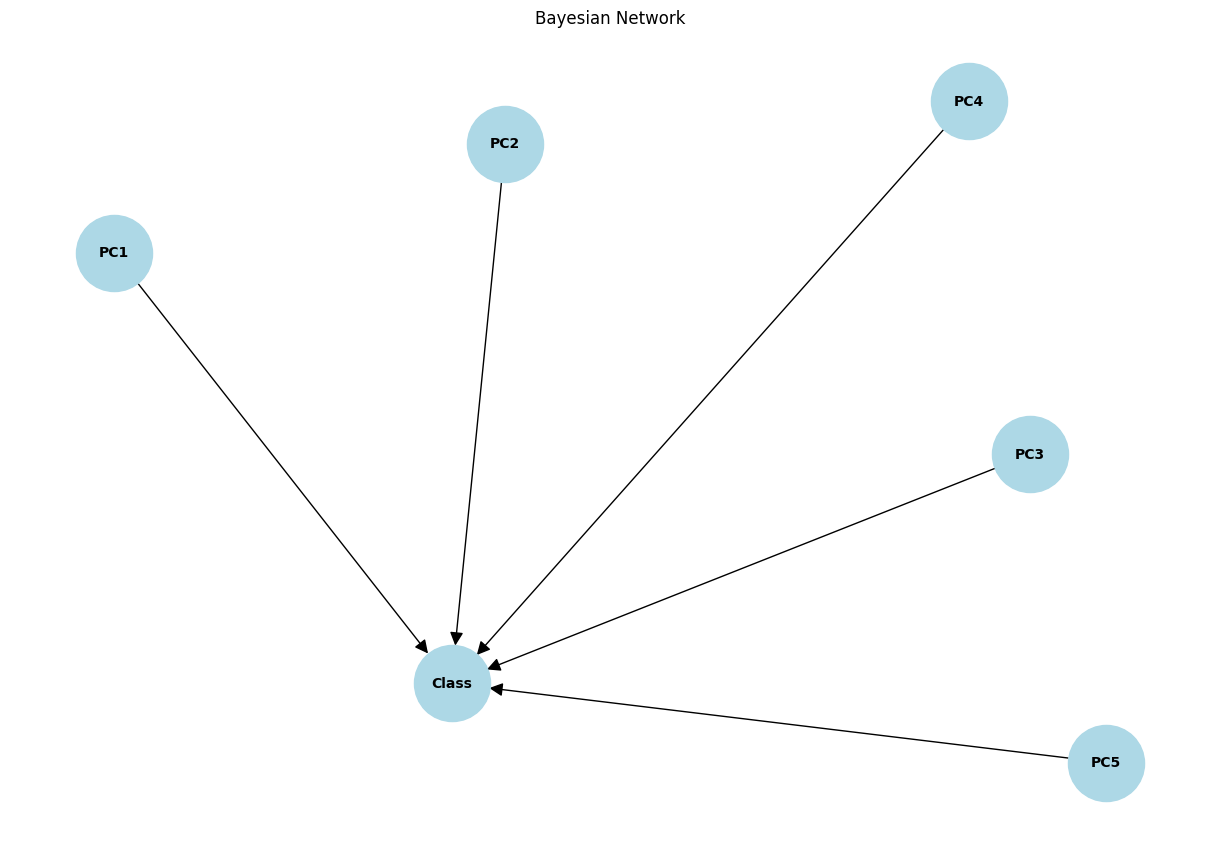

In [5]:
import networkx as nx

import matplotlib.pyplot as plt

# Convert the Bayesian Network to a networkx graph
G = nx.DiGraph(model.edges())

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', arrowsize=20)
plt.title('Bayesian Network')
plt.show()

In [6]:
from pgmpy.estimators import MaximumLikelihoodEstimator

# Fit the model to the data
model.fit(df_ori, estimator=MaximumLikelihoodEstimator)

ValueError: Product space too large to allocate arrays!

# try pgmax

In [8]:
!pip install pgmax

^C


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/77.5 kB ? eta -:--:--
   ---------------------------------------- 77.5/77.5 kB 4.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   --------------- ------------------------ 0.4/1.1 MB 8.7 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 11.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------------- -------------------------- 0.7/2.2 MB 23.5 MB/s eta 0:00:01
   ----------------------- ---------------- 1.3/2.2 MB 20.6 MB/s eta 0:00:01
   ----------------------- ---------------- 1.3/2.2 MB 20.6 MB/s eta 0:00:01
   ----------------------- ---------------- 1.3/2.2 MB 20.6 MB/s eta 0:00:01
   ----------------------- ---------------- 1.3/2.2 MB 20.6 MB/s eta 0:00:01
 


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from pgmax import fgraph, fgroup, infer, vgroup
# Create the variable group
variables = vgroup.NDVarArray(num_states=2, shape=(50, 50))

# Initialize the factor graph
fg = fgraph.FactorGraph(variable_groups=variables)

In [13]:
print(variables)
fg

NDVarArray(shape=(50, 50), num_states=2, _hash=1140906768000000000)


FactorGraph(variable_groups=[NDVarArray(shape=(50, 50), num_states=2, _hash=1140906768000000000)])

In [14]:
# Create the pairwise factor group
variables_for_factors = []
for ii in range(50):
  for jj in range(50):
    kk = (ii + 1) % 50
    ll = (jj + 1) % 50
    variables_for_factors.append([variables[ii, jj], variables[kk, jj]])
    variables_for_factors.append([variables[ii, jj], variables[ii, ll]])

factor_group = fgroup.PairwiseFactorGroup(
    variables_for_factors=variables_for_factors,
    log_potential_matrix=0.8 * np.array([[1.0, -1.0], [-1.0, 1.0]]),
)

# Add the pairwise factors to the factor graph
fg.add_factors(factor_group)

In [15]:
fg

FactorGraph(variable_groups=[NDVarArray(shape=(50, 50), num_states=2, _hash=1140906768000000000)])

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes for each variable
features = df_ori.columns.tolist()
target = 'Class'
variables = features

for variable in variables:
    G.add_node(variable)

# Add edges between each feature and the target
for feature in features:
    if feature != target:
        G.add_edge(feature, target)

# Draw the network
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrows=True)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

plt.title('Bayesian Network Visualization')
plt.show()
